<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/1205_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1. 파이썬 딥러닝 텐서플로 ch4. 1-3, pg. 142~181
# Part 04. 합성곱 신경망(CNN)
## 01. 합성곱 신경망
- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터비전 분야에서 많이 사용됨
- 이미지분류, 객체 탐지, 스타일 전이 등
  - 객체탐지 : 경계 박스(bounding box) 문제는 회귀분석, 클래스 예측 문제는 분류
  - 스타일 전이 : 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀 새로운 이미지를 생성하는 기술

### 1-1. 이미지 표현
- 화소를 나타내는 숫자가 이미지의 강도를 나타내며 숫자가 클수록 더 강한 특성
 - 흑백 : 0~255사이의 숫자로 각 픽셀의 화소 값 표현, 0은 검은색, 255는 흰색
 - 컬러 : R, G, B 채널로 구성된 3장의 이미지를 하나로 결합해 표현, 0~255 사이의 숫자가 클수록 해당 색상을 강하게 표현

### 1-2. 합성곱(convolution)
- 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용해 입력 이미지에 대한 특성을 추출하는 방법
- `특성맵`(feature map) : 합성곱 연산을 통해 추출된 이미지, 딥러닝 모델 학습에 사용시 성능 개선
- 이미지에 필터를 적용하는 합성곱 연산
 - 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영
 - 입력 이미지와 커널이 겹치는 부분에 대하여 element-wise 곱셈 연산을 수행 후 모두 더한 단일 스칼라 값
 - 연산 결과는 추출된 이미지의 특성맵의 값
- `오차 역전파`(back propagation)시 커널의 가중치를 업데이트
 - `공유 가중치`(shared weights) : 오차 역전파시 커널의 그래디언트를 계산할 때 커널 사이즈에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음

### 1-3 채널(channel)
- 입력 이미지를 구성하는 2차원 배열의 개수
- 흑백이미지는 단일채널, 컬러이미지는 3개의 채널
- 입력 이미지가 여러개의 채널을 갖는 경우 합성곱 연산 수행시 채널 개수만큼 커널이 생성되며 채널마다 커널을 하나씩 적용해 연산 수행. 이후 element-wise 덧셈 연산으로 모두 더해 최종 특성맵 생성

### 1-4. 스트라이드(stride)
- 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나갈 때 이동하는 간격, 주로 1 또는 2로 설정
- 스트라이드를 2로 설정시 특성맵의 크기가 1/2로 줄어듦

### 1-5. 패딩(padding)
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정
- 일반적으로 zero-padding 사용 : 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출
- 케라스의 Covn2D 레이어에서 padding='same'으로 설정시 zero-padding 적용 (기본값은 'valid')

### 1-6. 특성맵 사이즈
- 출력 데이터의 크기
> $(Output Height, Output Width) = ( \frac{Image Height + 2P - Kernel Height}{S}+1, \frac{Image Width + 2P - Kernel Width}{S}+1)$
 - Image Height, Image Width : 입력크기 (input size)
 - Kernel Height, Kernel Width : 필터 크기 (kernel size)
 - S : stride
 - P : padding
 - Output Height, Output Width : 출력 크기 (output size)

### 1-7. 풀링(Pooling)
- 추출된 특성맵에 대해 다운샘플링하여 이미지의 크기를 축소하는 레이어
- 이미지 축소를 통해 연산량을 감소, 과대적합 방지
 - 최대풀링 (max pooling) : 값이 큰 값이 다른 특징들을 대표, 좋은 성능
 - 평균 풀링 (average pooling)
- 풀링 레이어도 스트라이드 값을 가지며 2로 설정시 출력 이미지가 1/2로 줄어듦

## 02. 간단한 모델 생성
### 2-1. 데이터 로드 및 전처리

In [ ]:
# tensorflow 모듈 임포트
import tensorflow as tf

# mnist 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


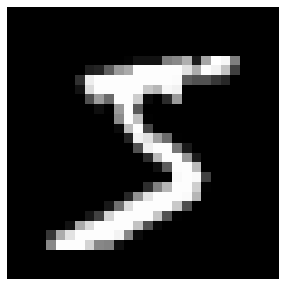

In [ ]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- CNN 모델에 주입하기 위해서는 색상을 나타내는 채널 추가
 - 채널을 추가하고자 하는 위치에 'tf.newaxis' 작성

In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2. Sequential API로 모델 생성 및 학습
- 합성곱 레이어(3*3 크기 32종류) 1개, 풀링 레이어 1개
- Dense layer 적용을 위해 Flatten layer 추가해 1차원 레이어로 변환

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2173 - accuracy: 0.9393 - val_loss: 0.0923 - val_accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0805 - accuracy: 0.9771 - val_loss: 0.0652 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0606 - accuracy: 0.9825 - val_loss: 0.0554 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0366 - accuracy: 0.9891 - val_loss: 0.0550 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0585 -

In [ ]:
model.evaluate(x_valid_in, y_valid)
# 약 98%의 정확도
# 4 epoch 이후부터는 과대적합

313/313 [==============================] - 3s 9ms/step - loss: 0.0523 - accuracy: 0.9844


[0.052331529557704926, 0.9843999743461609]

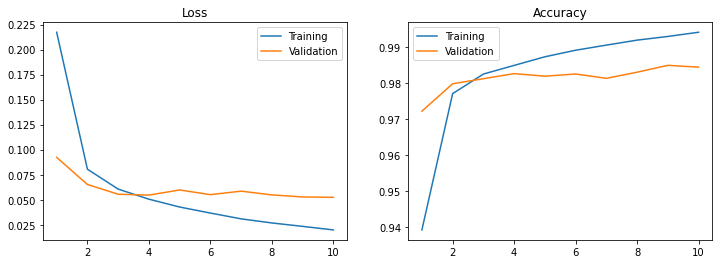

In [ ]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 10)

### 2-3. 모델 구조 파악
- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환
 - (3, 3) 크기의 합성곱 필터를 사용하기 때문에 가로 세로 크기가 2씩 감소 (패딩과 무관)
 - 서로 다른 32개의 필터를 적용했기 때문에 (26, 26) 크기의 특성맵이 32개 생성됨
 - (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처를 추출한 것
- (2, 2) 크기의 풀링 레이어를 적용했기에 이미지 크기가 1/2로 감소
- Flatten층에서 3차원 텐서를 1차원 텐서로 펼치면 (13*13*32)개 원소를 갖는 1차원 벡터가 됨
- 1차원 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- 입력 텐서는 (None, 28, 28, 1) 형태
 - 가장 앞에 있는 축의 None 값은 배치 크기가 들어오는 위치 (어떤 값이든 가능하다는 의미)
- 출력 텐서는 10개의 노드를 갖는 1차원 벡터 형태

In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어
model.layers
# 파이썬 리스트 형태로 출력

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫번째 레이어의 가중치 행렬 추출
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.12391716, -0.09938227,  0.50991774,  0.26424435,
            0.23130648,  0.29495192, -1.0224655 , -0.56652766,
           -0.360807  , -1.2519069 ,  0.21542212,  0.16921386,
           -0.7629568 ,  0.523815  , -0.26558682, -0.34824276,
           -0.3892672 ,  0.54317963,  0.37587473, -1.4907597 ,
           -1.1891752 ,  0.33779454, -0.5885926 ,  0.2966039 ,
           -0.07448643,  0.20008455, -0.555765  , -0.03652085,
            0.33413577,  0.24731919,  0.09742219, -0.22149387]],
 
         [[ 0.28197256, -0.22435401,  0.7183408 ,  0.24021508,
            0.20158917, -0.35938692, -0.7512712 ,  0.02739558,
            0.02960626, -0.8412541 ,  0.29836375, -0.29412934,
           -1.17131   ,  0.29110694, -0.08775706, -0.06575695,
            0.21613051, -0.17296496,  0.22485277, -0.6131981 ,
            0.06558976,  0.49420515, -0.19367233,  0.3520959 ,
            0.43171296,  0.06245995, -0.21

- 2개의 텐서플로 변수 행렬로 구성된 가중치 행렬
 - 첫번째 변수 (conv/kernel:0)는 커널(합성곱필터) 행렬의 가중치
    - shape=(3, 3, 1, 32) : (3, 3)은 필터의 크기 (1)은 입력층의 채널 개수, (32)는 출력층의 채널 개수
    - 학습 가능한 파라미터의 수는 3*3*1*32 = 288개
 - 두번째 변수 (conv/bias:0)는 각 커널의 상수항(bias)를 의미
    - shape=(32,) : 출력층의 채널 수
- 총 학습 가능한 파라미터 수는 288+32 = 320개

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.12391716, -0.09938227,  0.50991774,  0.26424435,
           0.23130648,  0.29495192, -1.0224655 , -0.56652766,
          -0.360807  , -1.2519069 ,  0.21542212,  0.16921386,
          -0.7629568 ,  0.523815  , -0.26558682, -0.34824276,
          -0.3892672 ,  0.54317963,  0.37587473, -1.4907597 ,
          -1.1891752 ,  0.33779454, -0.5885926 ,  0.2966039 ,
          -0.07448643,  0.20008455, -0.555765  , -0.03652085,
           0.33413577,  0.24731919,  0.09742219, -0.22149387]],

        [[ 0.28197256, -0.22435401,  0.7183408 ,  0.24021508,
           0.20158917, -0.35938692, -0.7512712 ,  0.02739558,
           0.02960626, -0.8412541 ,  0.29836375, -0.29412934,
          -1.17131   ,  0.29110694, -0.08775706, -0.06575695,
           0.21613051, -0.17296496,  0.22485277, -0.6131981 ,
           0.06558976,  0.49420515, -0.19367233,  0.3520959 ,
           0.43171296,  0.06245995, -0.2163354 , -0.857762

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.32260546, -0.07252263, -0.01696183, -0.2818547 , -0.35830444,
       -0.06450637, -0.09301714, -0.14807482, -0.18769412,  0.09704919,
       -0.2476475 , -0.15200523, -0.01638445, -0.00786297, -0.295868  ,
       -0.18892178, -0.18303508, -0.2949993 , -0.11385179,  0.13678369,
       -0.00589472, -0.38956589, -0.01826776, -0.44849432, -0.00380842,
       -0.22675915, -0.33125633, -0.18119642, -0.33225417, -0.26485002,
       -0.04157301, -0.04338353], dtype=float32)>

In [ ]:
# name 속성 사용하여 레이어 선택
model.get_layer('conv')

- 모델에 입력 데이터를 넣어주고, 첫번째와 두번째 레이어의 출력을 최종 출력으로 갖는 모델 activator 정의

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 146ms/step


2

In [ ]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

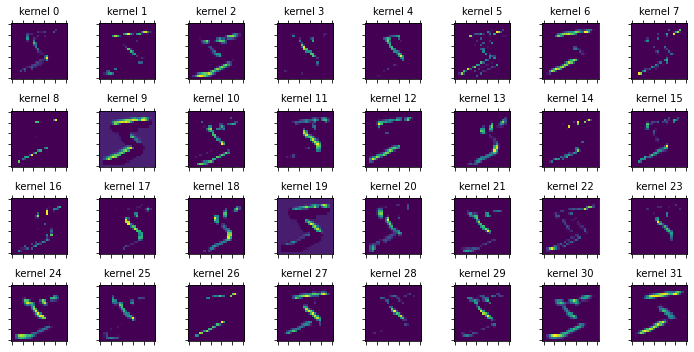

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()

In [ ]:
# 두번째 레이어 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


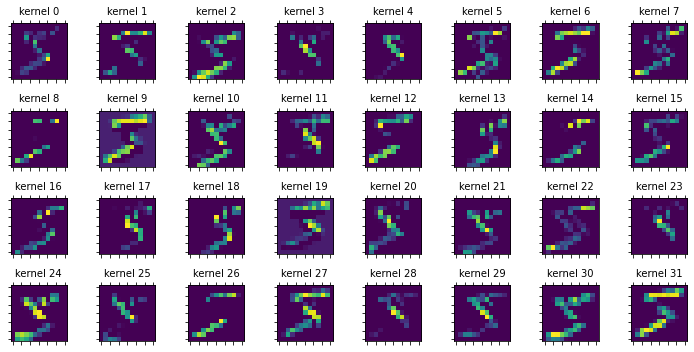

In [ ]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()

## 03. 복잡한 모델 생성
### 3-1. 데이셋 준비

In [ ]:
# tensorflow 모듈 임포트
import tensorflow as tf

# mnist 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 0~9까지 숫자를 맞추는 정답 외에 홀수(1)인지 짝수(0)인지 판단하는 정답(y_odd)를 추가

In [ ]:
# 새로운 출력값 배열 생성(홀수:1, 짝수:0)
import numpy as np
import pandas as pd

y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- expand_dims() 함수에 원본 배열 입력 후 새롭게 추가하려는 축의 인덱스 지정시 추가됨
- 축의 인덱스 -1로 지정시 끝에 추가됨

In [ ]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2. Functional API로 다중 입력, 출력 레이어 생성

- 입력 레이어는 Conv2D 레이어와 Flatten 레이어에 대한 2개의 출력을 갖게 됨
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되며 Concatenate레이어에서 합쳐진 다음에 Dense 레이어를 통과

In [ ]:
# Functional API를 이용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

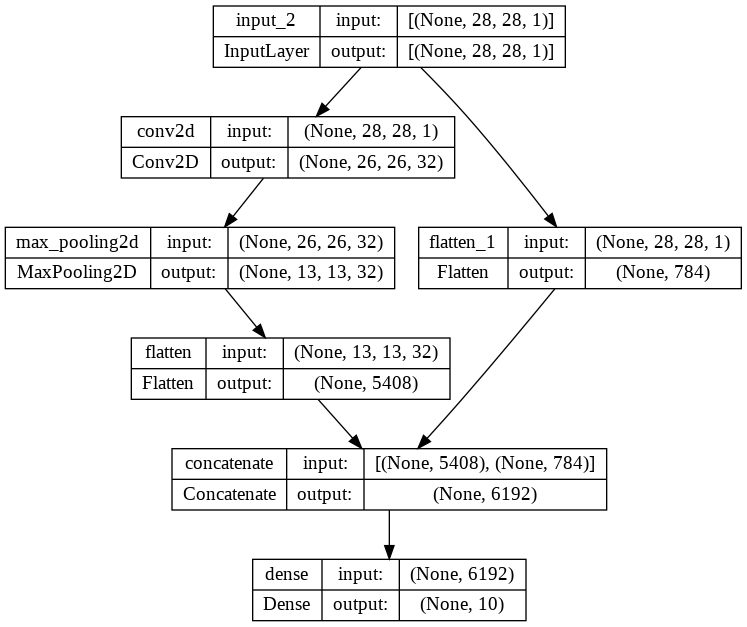

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2013 - accuracy: 0.9430 - val_loss: 0.0793 - val_accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0670 - val_accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0586 - accuracy: 0.9827 - val_loss: 0.0575 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0564 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0694 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0608 -

- 입력이미지와 해결해야하는 문제가 복잡한 경우에는 모델의 구조를 다양하게 만들어서 더 좋은 성능을 보여주는 모델을 찾는 과정 필요


### 3-3. 다중 출력 분류 모델

In [ ]:
# Functional API를 이용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flaten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flaten_layer (Flatten)         (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


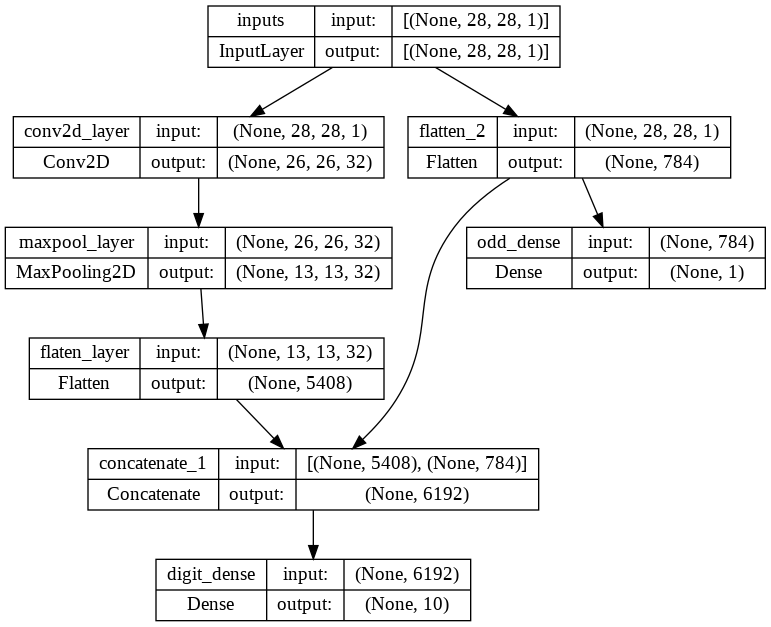

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 컴파일시 각각의 출력 Dense 레이어에 name 속성으로 digit_dense, odd_dense를 지정한 것을 key로 하고, 해당 키에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
- 훈련시 출력값을 2개 지정, 레이어에 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열 입력 (검증 데이터셋에 대해서도 마찬가지)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy',
                                      'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0*sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data = ({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3647 - digit_dense_loss: 0.2036 - odd_dense_loss: 0.3223 - digit_dense_accuracy: 0.9420 - odd_dense_accuracy: 0.8674 - val_loss: 0.2333 - val_digit_dense_loss: 0.0957 - val_odd_dense_loss: 0.2753 - val_digit_dense_accuracy: 0.9724 - val_odd_dense_accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2158 - digit_dense_loss: 0.0800 - odd_dense_loss: 0.2717 - digit_dense_accuracy: 0.9772 - odd_dense_accuracy: 0.8908 - val_loss: 0.2010 - val_digit_dense_loss: 0.0692 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9774 - val_odd_dense_accuracy: 0.8977
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1922 - digit_dense_loss: 0.0607 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.8950 - val_loss: 0.1906 - val_digit_dense_loss: 0.0613 - val_odd_dense_loss: 0.2585 - val_digit_dense_accuracy: 0.9800 -

In [ ]:
# 모델 성능
model.evaluate({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd})

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1380 - digit_dense_loss: 0.0124 - odd_dense_loss: 0.2511 - digit_dense_accuracy: 0.9965 - odd_dense_accuracy: 0.9025


[0.13798725605010986,
 0.012416081503033638,
 0.2511424422264099,
 0.9965166449546814,
 0.902483344078064]

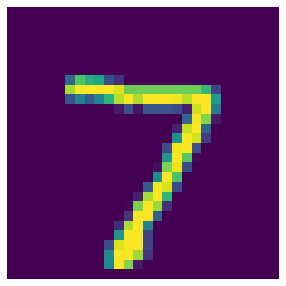

In [ ]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [ ]:
# 예측
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[1.6121783e-12 3.2714353e-10 7.4123396e-09 3.6596575e-06 2.2461591e-10
 2.9375884e-11 3.0062742e-20 9.9999601e-01 9.4251220e-09 1.9627659e-07]
[0.99944097]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds >0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-32-bde7b6ee3954>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds >0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4. 전이학습(transfer learning)
- 기존에 훈련한 모델의 일부를 가져와 그대로 사용하고 최종 출력층만 새롭게 추가하여 새로운 모델 재구성

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flaten_layer').output # 오타

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


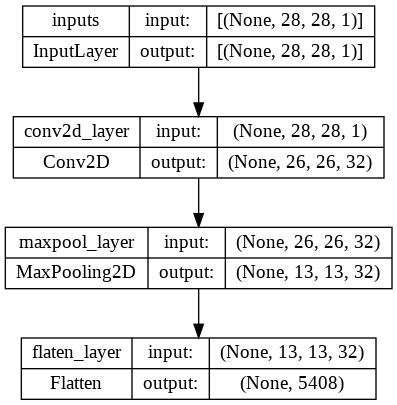

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, # 앞서 정의한 base_model 레이어로 추가
    tf.keras.layers.Dense(10, activation='softmax'), # 최종 분류기 역할의 Dense 레이어 새롭게 추가
])

digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- trainable 의미 : 모델훈련시 파라미터값이 업데이트됨

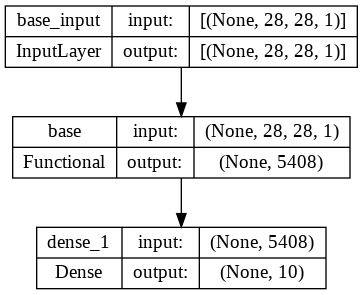

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1279 - accuracy: 0.9644 - val_loss: 0.0638 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0571 - accuracy: 0.9830 - val_loss: 0.0574 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0552 - val_accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0490 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0530 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0533 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0531 -

- 모델 인스턴스의 trainable 속성을 False로 지정시 모델의 파라미터 값이 고정되어 훈련으로 업데이트되지 않음

In [ ]:
# 베이스 모델의 가중치 고정 (freeze model)
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output,
                                           name='base_frozen')
  
base_model_frozen.trainable=False 
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

- 앞서 고정한 320개의 파라미터는 훈련이 불가능하다는 것이 표시되어있음
- 훈련 가능한 파라미터는 Flatten 레이어 이전에 존재하는 Conv2D레이어의 파라미터 320개를 포함하지 않음

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1148 - accuracy: 0.9692 - val_loss: 0.0618 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0484 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0574 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0509 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.0521 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0535 - val_ac

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정

In [ ]:
# 베이스모델의 Conv2D레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input,
                                           outputs=base_model.output,
                                           name='base_frozen')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input,
                                           outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flaten_layer (Flatten)      (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1122 - accuracy: 0.9699 - val_loss: 0.0573 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 0.0550 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0471 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0552 - val_ac